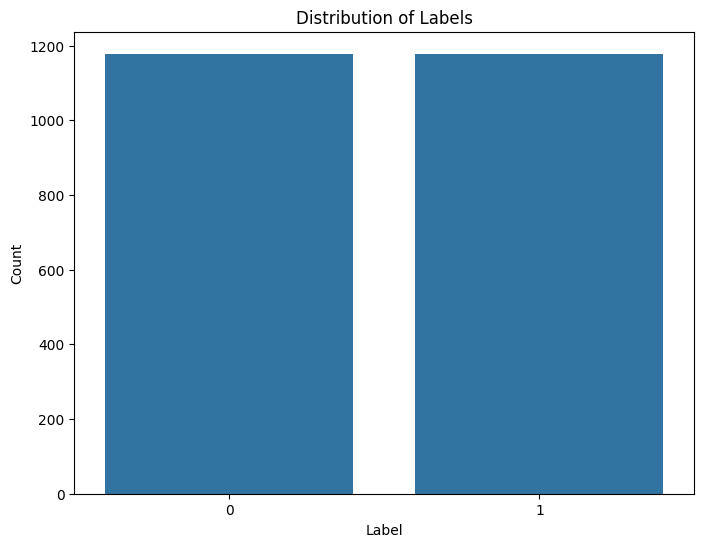

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/trainer_tf.py:118: FutureWarning: The class `TFTrainer` is deprecated and will be removed in version 5 of Transformers. We recommend using native Keras instead, by calling methods like `fit()` and `predict()` directly on the model object. Detailed examples of the Keras style can be found in our examples at https://github.com/huggingface/transformers/tree/main/examples/tensorflow
  warnings.warn(


In [1]:















import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification, TFTrainer, TFTrainingArguments

# Load the dataset
df = pd.read_csv('/content/dataset.tsv', sep='\t', usecols=["text", "label"])

# Data visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Preprocess the data
X = df['text']
Y = df['label']

# Tokenize the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_data = tokenizer(list(X), padding=True, truncation=True, return_tensors="tf")

# Create TensorFlow Dataset
tf_dataset = tf.data.Dataset.from_tensor_slices((dict(tokenized_data), Y))

# Train-test split
train_dataset, test_dataset = tf_dataset.take(int(0.8 * len(df))), tf_dataset.skip(int(0.8 * len(df)))

# Define training arguments
training_args = TFTrainingArguments(
    output_dir="./output",
    evaluation_strategy="steps",
    eval_steps=None,
    save_total_limit=2,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
)

# Define the model
with training_args.strategy.scope():
    model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

# Instantiate the trainer
trainer = TFTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate(test_dataset)

# Save the model
model.save_pretrained('dark_pattern_detection_model')


Some layers from the model checkpoint at dark_pattern_detection_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at dark_pattern_detection_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Predicted label: 1


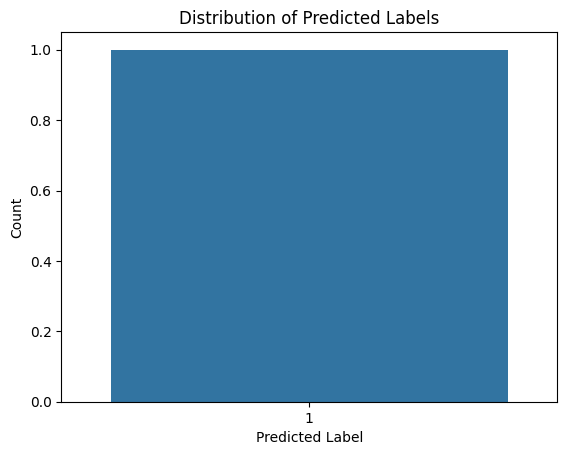

In [2]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = TFBertForSequenceClassification.from_pretrained('dark_pattern_detection_model')

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to preprocess input text and make predictions
def predict_dark_pattern(text):
    # Tokenize the input text
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="tf")

    # Make predictions
    outputs = model(inputs)

    # Get predicted label (0 for not dark pattern, 1 for dark pattern)
    predicted_label = tf.argmax(outputs.logits, axis=1).numpy()[0]

    # Return the predicted label
    return predicted_label

# Example usage:
input_text = "Limited time offer! Shop now!"
predicted_label = predict_dark_pattern(input_text)
print("Predicted label:", predicted_label)

# Data visualization
def visualize_predicted_labels(predictions):
    sns.countplot(x=predictions)
    plt.title('Distribution of Predicted Labels')
    plt.xlabel('Predicted Label')
    plt.ylabel('Count')
    plt.show()

# Example usage for visualization
input_texts = ["Hurry! Only 2 left in stock"]
predicted_labels = [predict_dark_pattern(text) for text in input_texts]
visualize_predicted_labels(predicted_labels)

Some layers from the model checkpoint at dark_pattern_detection_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at dark_pattern_detection_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Columns in the TSV file: Index([' text'], dtype='object')
Loaded input texts: ['FLASH SALE | ', 'Pillowcases & Shams', 'Write a review', 'To start your return, simply clito ship the item(s) to our warehouse.', ' signup (privacy policy) ', 'In demand', 'We Buyers in remote areas etc may need to collect from their nearest freight depot.', 'Hurry! Only', 'In Stock only 3 left', 'International Shipping Policy', 'Clothes, Shoes & Accessories', 'Hurry! Only 2 left', 'Primary Arms Scopes', 'ONLY 8 LEFT', 'MoTrail', 'LCD Ribbon Cables', 'READY FOR YOUR NEXT AUTHENTIC NHL JERSEY?', 'OUR BEST SELLING GOGGLE', '1,142 people have added to cart recently', 'Limited Availability', "No thanks. I don't like free things...", ' read you will want to read -- Five Book Group Favourites * Sunday Post *', ' Supply & Demand ', 'Michael in Pontiac, United States purchased a  ', 'Bathroom Lighting', ' Shop Optics > ', '9 people are viewing this.', '894 Claimed! Hurry, only a few left!', '77 PEOPLE LIKE THIS', '

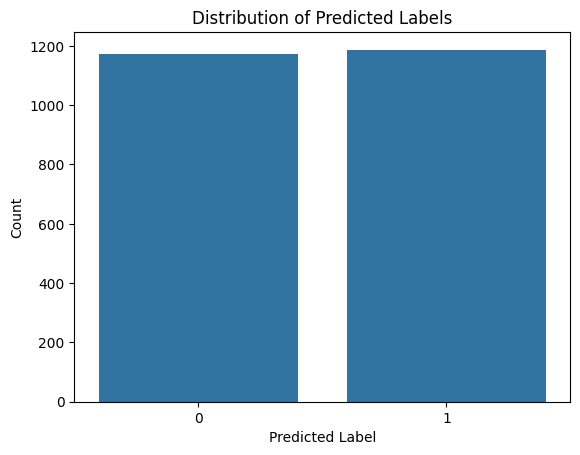

In [15]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = TFBertForSequenceClassification.from_pretrained('dark_pattern_detection_model')

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def visualize_predicted_labels(predictions):
    # Count the occurrences of each label
    label_counts = pd.Series(predictions).value_counts().sort_index()

    # Plot an Area Chart
    plt.fill_between(label_counts.index, label_counts.values, color="skyblue", alpha=0.4)
    plt.plot(label_counts.index, label_counts.values, color="Slateblue", alpha=0.6, linewidth=2)

    # Add labels and title
    plt.title('Distribution of Predicted Labels')
    plt.xlabel('Predicted Label')
    plt.ylabel('Count')
    plt.show()

# Data visualization
def visualize_predicted_labels(predictions):
    sns.countplot(x=predictions)
    plt.title('Distribution of Predicted Labels')
    plt.xlabel('Predicted Label')
    plt.ylabel('Count')
    plt.show()

# Load the text data from the TSV file
def load_text_data(file_path):
    try:
        df = pd.read_csv(file_path, sep='\t')
        print("Columns in the TSV file:", df.columns)  # Debug print
        # Check for ' text' instead of 'text' in columns
        if ' text' in df.columns:
            return df[' text'].tolist()  # Access the column with space before 'text'
        else:
            print("Column 'text' not found in the TSV file.")  # Debug print
            return []
    except FileNotFoundError:
        print("File not found. Please check the file path.")  # Debug print
        return []
    except Exception as e:
        print("An error occurred:", str(e))  # Debug print
        return []

# Example usage:
input_texts = load_text_data('/content/output.tsv')
if input_texts:
    print("Loaded input texts:", input_texts)  # Debug print
    predicted_labels = [predict_dark_pattern(text) for text in input_texts]
    visualize_predicted_labels(predicted_labels)


